## Choose Your Own Algorithm

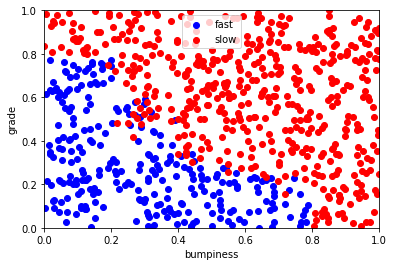

In [1]:
import sys
sys.path.append("/home/cit5/Downloads/ud120-projects-master/tools/")
sys.path.append('/home/cit5/Downloads/ud120-projects-master/choose_your_own')

import os
os.chdir('/home/cit5/Downloads/ud120-projects-master/choose_your_own')


import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
%matplotlib inline
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

# import the classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### kNN

Accuracy = 0.94


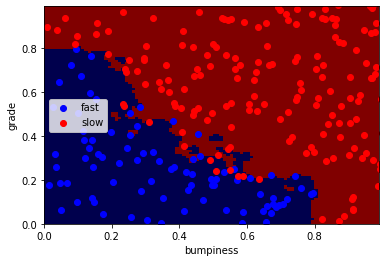

In [2]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(features_train, labels_train)

# print the accuracy and display the decision boundary
print('Accuracy = {0}'.format(clf.score(features_test, labels_test)))
prettyPicture(clf, features_test, labels_test)

## Random Forest

Accuracy = 0.916


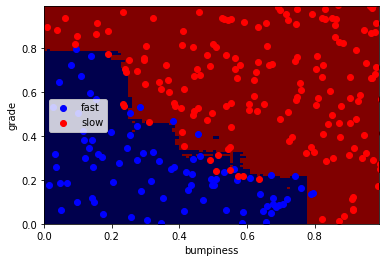

In [3]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(features_train, labels_train)

# print the accuracy and display the decision boundary
print('Accuracy = {0}'.format(clf.score(features_test, labels_test)))
prettyPicture(clf, features_test, labels_test)

### AdaBoost

Accuracy = 0.916


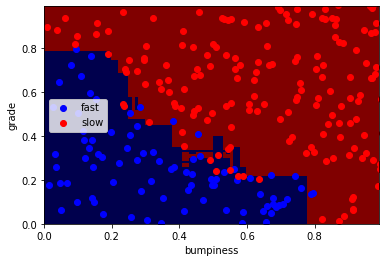

In [4]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
clf = clf.fit(features_train, labels_train)

# print the accuracy and display the decision boundary
print('Accuracy = {0}'.format(clf.score(features_test, labels_test)))
prettyPicture(clf, features_test, labels_test)